In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import os
import inspect
import sys

# python add-ons
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import seaborn as sns
import wrf
import wrf.latlonutils as llutils
from optwrf import postwrf, plots, util

In [17]:
# Define the path to where you WRF data file is stored 
# (note: don't forget to add the "/" at the end of the directory)
wrfout_dir = '/Users/jsward/Documents/wrf_output/offshore_wind/no_wfp/28mp4lw4sw2lsm5pbl1cu/'
wrfout_file = 'wrfout_d03_2020-06-05'
wrfout_file_processed = 'ow_buoy_' + wrfout_file

met_data = xr.open_dataset(wrfout_dir+wrfout_file_processed)

In [18]:
met_data

<xarray.Dataset>
Dimensions:     (Time: 144, bottom_top: 35, bottom_top_stag: 36, south_north: 183, south_north_stag: 184, west_east: 144, west_east_stag: 145)
Coordinates:
  * Time        (Time) datetime64[ns] 2020-06-05 ... 2020-06-05T23:50:00
    XLONG       (south_north, west_east) float32 ...
    XLAT        (south_north, west_east) float32 ...
    XTIME       (Time) float32 ...
Dimensions without coordinates: bottom_top, bottom_top_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    U           (Time, bottom_top, south_north, west_east_stag) float32 ...
    V           (Time, bottom_top, south_north_stag, west_east) float32 ...
    W           (Time, bottom_top_stag, south_north, west_east) float32 ...
    height_agl  (Time, bottom_top, south_north, west_east) float32 ...
    wspd        (Time, bottom_top, south_north, west_east) float32 ...
    wdir        (Time, bottom_top, south_north, west_east) float32 ...
    UST         (Time, south_north, west_east) float32 ...
    HFX_FORCE   (Time) float32 ...
    PBLH        (Time, south_north, west_east) float32 ...
    EL_PBL      (Time, bottom_top_stag, south_north, west_east) float32 ...
    theta       (Time, bottom_top, south_north, west_east) float32 ...
    theta_e     (Time, bottom_top, south_north, west_east) float32 ...
    tv          (Time, bottom_top, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE:                      2020-06-05_00:00:00
    SIMULATION_START_DATE:           2020-06-05_00:00:00
    WEST-EAST_GRID_DIMENSION:        145
    SOUTH-NORTH_GRID_DIMENSION:      184
    BOTTOM-TOP_GRID_DIMENSION:       36
    DX:                              1333.3334
    DY:                              1333.3334
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      0
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      28
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               1
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     1
    GWD_OPT:                         0
    SF_URBAN_PHYSICS:                0
    SF_SURFACE_MOSAIC:               0
    SF_OCEAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        1
    SMOOTH_OPTION:                   0
    SWRAD_SCAT:                      1.0
    W_DAMPING:                       0
    DT:                              3.3333333
    RADT:                            1.0
    BLDT:                            0.0
    CUDT:                            0.0
    AER_OPT:                         0
    SWINT_OPT:                       1
    AER_TYPE:                        1
    AER_AOD550_OPT:                  1
    AER_

In [19]:
# Select and plot the time series for a single point
# First, find the x, y indicies for a latitude, longitude pair 
# correspoonding to a specific location (e.g., NYC). 
# Hudson North -- LAT: 39° 58' 09.40"N, LONG: 72° 43' 00.09"W (39.969278, -72.716692)
# Hudson South -- LAT: 39° 32' 48.38"N, LONG: 73° 25' 44.01"W (39.546772, -73.428892)

loc_north_buoy = util.ll_to_xy(met_data, 39.969278, -72.716692)
loc_south_buoy = util.ll_to_xy(met_data, 39.546772, -73.428892)

In [31]:
# Interpolate wind speeds to 20m height
wind_speed20 = wrf.interplevel(met_data.wspd, met_data.height_agl, 20)
# Interpolate wind speeds to 40m height
wind_speed40 = wrf.interplevel(met_data.wspd, met_data.height_agl, 40)
# Interpolate wind speeds to 60m height
wind_speed60 = wrf.interplevel(met_data.wspd, met_data.height_agl, 60)
# Interpolate wind speeds to 80m height
wind_speed80 = wrf.interplevel(met_data.wspd, met_data.height_agl, 80)
# Interpolate wind speeds to 100m height
wind_speed100 = wrf.interplevel(met_data.wspd, met_data.height_agl, 100)

# Interpolate virtual potential temperature to 20m height
tv20 = wrf.interplevel(met_data.tv, met_data.height_agl, 20)
# Interpolate virtual potential temperature to 20m height
tv40 = wrf.interplevel(met_data.tv, met_data.height_agl, 40)
# Interpolate virtual potential temperature to 20m height
tv60 = wrf.interplevel(met_data.tv, met_data.height_agl, 60)
# Interpolate virtual potential temperature to 20m height
tv80 = wrf.interplevel(met_data.tv, met_data.height_agl, 80)
# Interpolate virtual potential temperature to 20m height
tv100 = wrf.interplevel(met_data.tv, met_data.height_agl, 100)

In [32]:
# Get variables at the two buoy locations
# NOTE: Longitude/XLONG (west_east) ~ x; Latitude/XLAT (south_north) ~ y
# Friction velocity (u*)
ust_n = met_data.UST.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
ust_s = met_data.UST.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 20m wind speed
wspd20_n = wind_speed20.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
wspd20_s = wind_speed20.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 40m wind speed 
wspd40_n = wind_speed40.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
wspd40_s = wind_speed40.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 60m wind speed
wspd60_n = wind_speed60.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
wspd60_s = wind_speed60.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 80m wind speed
wspd80_n = wind_speed80.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
wspd80_s = wind_speed80.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 100m wind speed
wspd100_n = wind_speed100.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
wspd100_s = wind_speed100.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])

In [33]:
# 20m virtual potential temperature
tv20_n = tv20.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
tv20_s = tv20.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 40m virtual potential temperature
tv40_n = tv40.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
tv40_s = tv40.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 60m virtual potential temperature
tv60_n = tv60.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
tv60_s = tv60.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 80m virtual potential temperature
tv80_n = tv80.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
tv80_s = tv80.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])
# 100m virtual potential temperature
tv100_n = tv100.isel(west_east=loc_north_buoy[0], south_north=loc_north_buoy[1])
tv100_s = tv100.isel(west_east=loc_south_buoy[0], south_north=loc_south_buoy[1])

In [44]:
# Calculate the Richardson number
g = 9.81 # m*s^{-1}
Ri20_40 =  (g/tv20_n)*((tv20_n - tv40_n)*(20 - 40))/(20 - 40)**2
Ri20_60 =  (g/tv20_n)*((tv20_n - tv60_n)*(20 - 60))/(20 - 60)**2
Ri20_80 =  (g/tv20_n)*((tv20_n - tv80_n)*(20 - 80))/(20 - 80)**2
Ri20_100 = (g/tv20_n)*((tv20_n - tv100_n)*(20 - 100))/(20 - 100)**2

Ri40_60 =  (g/tv40_n)*((tv40_n - tv60_n)*(40 - 60))/(40 - 60)**2
Ri40_80 =  (g/tv40_n)*((tv40_n - tv80_n)*(40 - 80))/(40 - 80)**2
Ri40_100 = (g/tv40_n)*((tv40_n - tv100_n)*(40 - 100))/(40 - 100)**2

Ri60_80 =  (g/tv60_n)*((tv60_n - tv80_n)*(60 - 80))/(60 - 80)**2
Ri60_100 = (g/tv60_n)*((tv60_n - tv100_n)*(60 - 100))/(60 - 100)**2

Ri80_100 = (g/tv80_n)*((tv80_n - tv100_n)*(80 - 100))/(80 - 100)**2

In [47]:
d = {
     'Ri_20m_40m': Ri20_40, 'Ri_20m_60m': Ri20_60, 
     'Ri_20m_80m': Ri20_80, 'Ri_20m_100m': Ri20_100,
     'Ri_40m_60m': Ri40_60, 'Ri_40m_80m': Ri40_80, 
     'Ri_40m_100m': Ri40_100, 'Ri_60m_80m': Ri60_80, 
     'Ri_60m_100m': Ri60_100, 'Ri_80m_100m': Ri80_100
    }
Ri_df = pd.DataFrame(data=d)

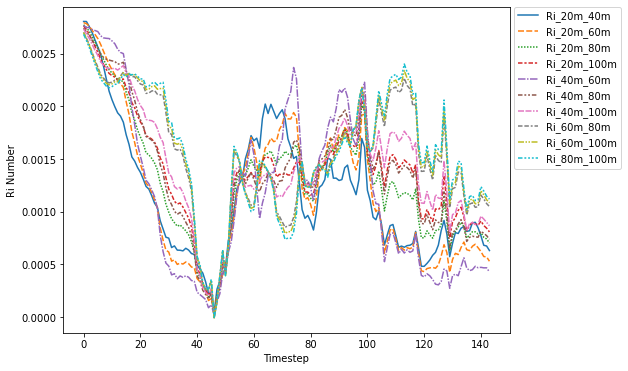

In [51]:
# Plot the Richardson numbers
plt.figure(figsize=(8,6))
sns.lineplot(data=Ri_df)
plt.xlabel("Timestep")
plt.ylabel("Ri Number")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)


In [ ]:
#